In [3]:
import gym
import numpy as np
from sac_tf2 import Agent
from utils import plot_learning_curve
from gym import wrappers
import pybullet_envs

c:\users\administrator\projects\reinforcementlearning\venv\lib\site-packages\gym\logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


... saving models ...
episode  0 score 45.0 avg_score 45.0
episode  1 score 24.0 avg_score 34.5
episode  2 score 17.0 avg_score 28.7
episode  3 score 29.0 avg_score 28.8
episode  4 score 30.0 avg_score 29.0
episode  5 score 15.0 avg_score 26.7
episode  6 score 42.0 avg_score 28.9
episode  7 score 17.0 avg_score 27.4
episode  8 score 33.0 avg_score 28.0
episode  9 score 24.0 avg_score 27.6
episode  10 score 22.0 avg_score 27.1
episode  11 score 9.0 avg_score 25.6
episode  12 score 21.0 avg_score 25.2
episode  13 score 26.0 avg_score 25.3
episode  14 score 13.0 avg_score 24.5
episode  15 score 17.0 avg_score 24.0
episode  16 score 39.0 avg_score 24.9
episode  17 score 10.0 avg_score 24.1
episode  18 score 16.0 avg_score 23.6
episode  19 score 25.0 avg_score 23.7
episode  20 score 22.0 avg_score 23.6
episode  21 score 42.0 avg_score 24.5
episode  22 score 19.0 avg_score 24.2
episode  23 score 13.0 avg_score 23.8
episode  24 score 18.0 avg_score 23.5
episode  25 score 22.0 avg_score 23.5
e

... saving models ...
episode  155 score 496.0 avg_score 220.9
... saving models ...
episode  156 score 366.0 avg_score 224.1
... saving models ...
episode  157 score 858.0 avg_score 231.4
... saving models ...
episode  158 score 989.0 avg_score 239.2
... saving models ...
episode  159 score 326.0 avg_score 241.7
... saving models ...
episode  160 score 399.0 avg_score 244.7
... saving models ...
episode  161 score 890.0 avg_score 252.7
... saving models ...
episode  162 score 643.0 avg_score 257.1
... saving models ...
episode  163 score 668.0 avg_score 261.7
... saving models ...
episode  164 score 519.0 avg_score 264.4
... saving models ...
episode  165 score 617.0 avg_score 269.2
... saving models ...
episode  166 score 1000.0 avg_score 277.6
... saving models ...
episode  167 score 1000.0 avg_score 286.2
... saving models ...
episode  168 score 1000.0 avg_score 294.2
... saving models ...
episode  169 score 1000.0 avg_score 301.7
... saving models ...
episode  170 score 1000.0 avg

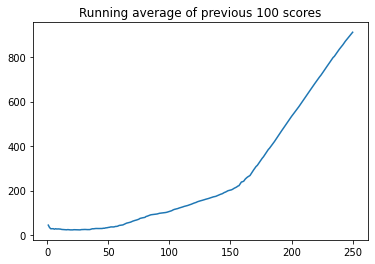

In [8]:
if __name__ == '__main__':
    env = gym.make('InvertedPendulumBulletEnv-v0')
    agent = Agent(input_dims=env.observation_space.shape, env=env,
            n_actions=env.action_space.shape[0])
    n_games = 250
    # uncomment this line and do a mkdir tmp && mkdir tmp/video if you want to
    # record video of the agent playing the game.
    #env = wrappers.Monitor(env, 'tmp/video', video_callable=lambda episode_id: True, force=True)
    filename = 'inverted_pendulum.png'

    figure_file = 'plots/' + filename

    best_score = env.reward_range[0]
    score_history = []
    load_checkpoint = False

    if load_checkpoint:
        agent.load_models()
        env.render(mode='human')

    for i in range(n_games):
        observation = env.reset()
        done = False
        score = 0
        while not done:
            action = agent.choose_action(observation)
            observation_, reward, done, info = env.step(action)
            score += reward
            agent.remember(observation, action, reward, observation_, done)
            if not load_checkpoint:
                agent.learn()
            observation = observation_
        score_history.append(score)
        avg_score = np.mean(score_history[-100:])

        if avg_score > best_score:
            best_score = avg_score
            if not load_checkpoint:
                agent.save_models()

        print('episode ', i, 'score %.1f' % score, 'avg_score %.1f' % avg_score)

    if not load_checkpoint:
        x = [i+1 for i in range(n_games)]
        plot_learning_curve(x, score_history, figure_file)